In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df_index= pd.read_excel(r"datasets/CSI300_Index_Level(2008-3-31).xlsx")
#delete row 0 1 2
df_index.drop([0,1,2],inplace=True)
df_index.head()
#change column name to Date and Index_Level
df_index.columns=['date','index_level']
#sort by date
df_index.sort_values(by='date',ascending=True,inplace=True)
#drop index 3595,3594
df_index.drop([3595,3594],inplace=True)
df_index

,date,index_level
3593,2008-03-31,3790.53
3592,2008-04-01,3582.86
3591,2008-04-02,3547.98
3590,2008-04-03,3650.7
3589,2008-04-07,3845.82
...,...,...
7,2022-12-26,3843.49
6,2022-12-27,3887.85
5,2022-12-28,3871.26
4,2022-12-29,3856.7


In [22]:
df_index['date']=pd.to_datetime(df_index['date'])
df_index.set_index("date", inplace=True)
monthly_groups=df_index.groupby(pd.Grouper(freq='M'))
#find the last day of each month
df_index_monthly=monthly_groups.last()
df_index_monthly.dropna(inplace=True)

In [23]:
#add index month1 month2 month3...
df_index_monthly['month'] = range(1, len(df_index_monthly) + 1)
df_index_monthly.set_index("month", inplace=True)
df_index_monthly


,index_level
month,
1,3790.53
2,3959.12
3,3611.33
4,2791.82
5,2805.21
...,...
174,4078.84
175,3804.89
176,3508.70


In [24]:
df_index_monthly['max_12'] = None
for i in range(13, len(df_index_monthly)+1):
    previous_12 = df_index_monthly.loc[i-12:i-1, 'index_level']  
    max_value = previous_12.max()  
    df_index_monthly.at[i, 'max_12'] = max_value  

df_index_monthly

,index_level,max_12
month,,
1,3790.53,None
2,3959.12,None
3,3611.33,None
4,2791.82,None
5,2805.21,None
...,...,...
174,4078.84,4940.37
175,3804.89,4940.37
176,3508.70,4940.37


In [25]:
#calculate ML = index_level/(max of last 12 months) and create a new column
df_index_monthly['ML'] = df_index_monthly['index_level']/df_index_monthly['max_12']
df_index_monthly

,index_level,max_12,ML
month,,,
1,3790.53,None,NaN
2,3959.12,None,NaN
3,3611.33,None,NaN
4,2791.82,None,NaN
5,2805.21,None,NaN
...,...,...,...
174,4078.84,4940.37,0.825614
175,3804.89,4940.37,0.770163
176,3508.70,4940.37,0.71021


In [26]:
#find the mean and standard deviation of ML for past 12 months
df_index_monthly['mean_12'] = None
df_index_monthly['std_12'] = None
for i in range(24, len(df_index_monthly)+1):
    previous_12 = df_index_monthly.loc[i-12:i-1, 'ML']  
    mean_value = previous_12.mean()  
    std_value = previous_12.std()  
    df_index_monthly.at[i, 'mean_12'] = mean_value  
    df_index_monthly.at[i, 'std_12'] = std_value

df_index_monthly

,index_level,max_12,ML,mean_12,std_12
month,,,,,
1,3790.53,None,NaN,None,None
2,3959.12,None,NaN,None,None
3,3611.33,None,NaN,None,None
4,2791.82,None,NaN,None,None
5,2805.21,None,NaN,None,None
...,...,...,...,...,...
174,4078.84,4940.37,0.825614,0.856407,0.058536
175,3804.89,4940.37,0.770163,0.850382,0.057589
176,3508.70,4940.37,0.71021,0.83879,0.058648


In [27]:
CCt = -1
df_index_monthly['CCt'] = None
for i in range(12+13, len(df_index_monthly)+1):
    previous_12 = df_index_monthly.loc[i-12:i-1, 'ML'] 
    ML_mean =  previous_12.mean()  
    ML_sd = previous_12.std()
    if df_index_monthly['ML'][i] < ML_mean - 1.5*ML_sd:
        CCt = 1

    else:
        CCt = 0

    df_index_monthly.at[i, 'CCt'] = CCt

In [28]:
#to csv
df_index_monthly.to_csv(r'1.5_CSI300_IL_Monthly_ML.csv', index = True, header=True)

In [29]:
df_index_monthly.describe()

,index_level
count,178.000000
mean,3372.998596
std,849.016839
min,1663.660000
25%,2643.937500
50%,3335.390000
75%,3872.162500
max,5351.960000


In [30]:
df_index_monthly['CCt'].describe()

count     154
unique      2
top         0
freq      145
Name: CCt, dtype: int64

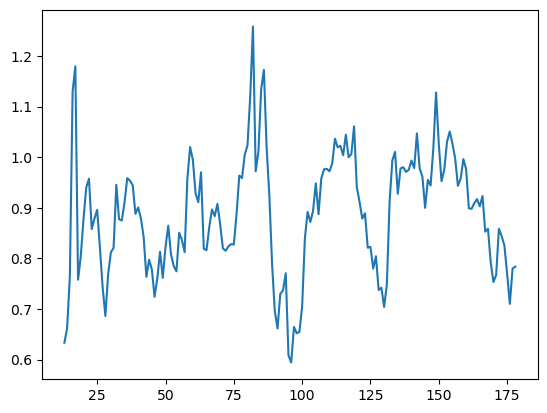

In [31]:
ypoints = df_index_monthly['ML']
plt.plot(ypoints)

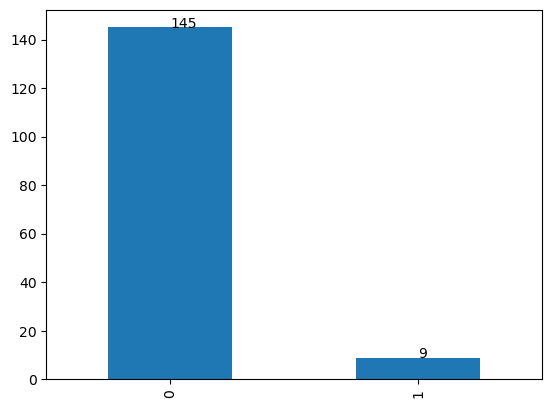

In [32]:
df_index_monthly['CCt'].value_counts().plot(kind='bar')
for index, value in enumerate(df_index_monthly['CCt'].value_counts()):
    plt.text(index, value, str(value))

plt.show()